In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)



In [3]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
data


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [8]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isnull().values.any()

False

In [10]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isnull().sum()

0

In [11]:

print(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())

['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']


In [12]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualify_cafv = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'][['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_qualify_cafv)
print()


Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]



In [16]:

# Get all TESLA cars with the model year and model made in Bothell City
tesla_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]
print("TESLA cars with the model year and model made in Bothell City:")
print(tesla_bothell)




TESLA cars with the model year and model made in Bothell City:
        VIN (1-10)     County     City State  Postal Code  Model Year   Make  \
39      5YJ3E1EA6L  Snohomish  Bothell    WA      98012.0        2020  TESLA   
217     5YJ3E1EB9N       King  Bothell    WA      98011.0        2022  TESLA   
218     7SAYGDEEXN  Snohomish  Bothell    WA      98012.0        2022  TESLA   
222     5YJ3E1EB6J       King  Bothell    WA      98011.0        2018  TESLA   
292     5YJXCBE40H       King  Bothell    WA      98011.0        2017  TESLA   
...            ...        ...      ...   ...          ...         ...    ...   
129778  5YJ3E1EB3K  Snohomish  Bothell    WA      98012.0        2019  TESLA   
129954  5YJ3E1EB3M  Snohomish  Bothell    WA      98021.0        2021  TESLA   
129976  5YJSA1S10E  Snohomish  Bothell    WA      98021.0        2014  TESLA   
130295  5YJ3E1EA8N  Snohomish  Bothell    WA      98021.0        2022  TESLA   
130392  5YJ3E1EA9J       King  Bothell    WA      98011.0

In [17]:
# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_range_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)][['Make', 'Model']]
print("Cars that have an electric range of more than 100 and were made after 2015:")
print(electric_range_100)
print()




Cars that have an electric range of more than 100 and were made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]



In [19]:
data['Electric Vehicle Type'].unique()


array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [20]:
data['Electric Vehicle Type'].isnull().sum()

0

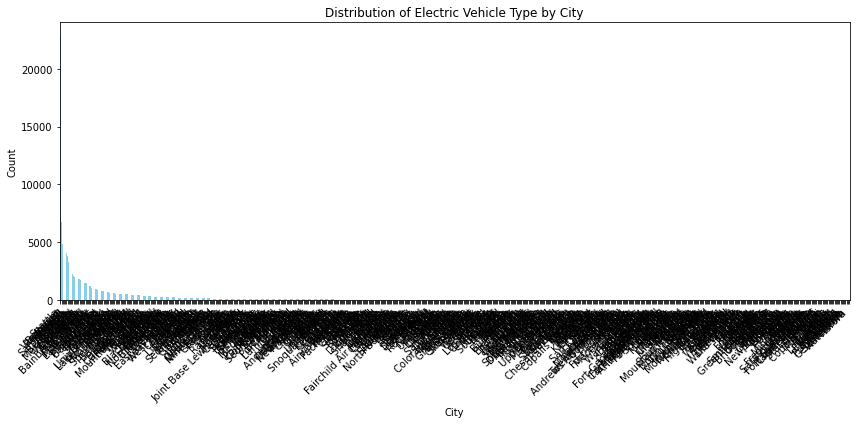

In [25]:
plt.figure(figsize=(12, 6))
data_filtered = data[data['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]
ax = data_filtered['City'].value_counts().plot(kind='bar', color='skyblue')
ax.set_title('Distribution of Electric Vehicle Type by City')
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

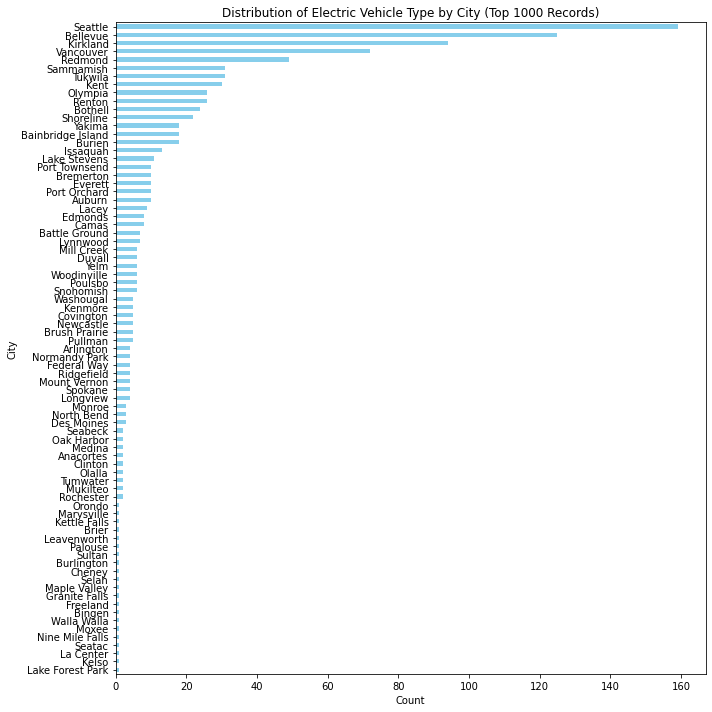

In [28]:
data_subset = data.head(1000)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 10))  # Adjust the figure size
data_filtered = data_subset[data_subset['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]
ax = data_filtered['City'].value_counts().sort_values().plot(kind='barh', color='skyblue')
ax.set_title('Distribution of Electric Vehicle Type by City (Top 1000 Records)')
ax.set_xlabel('Count')
ax.set_ylabel('City')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

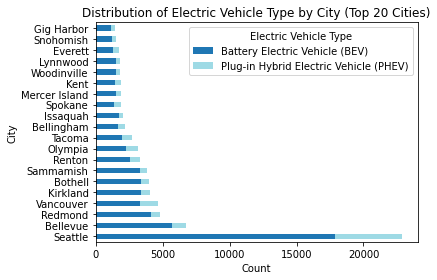

In [29]:
# Aggregate the data by grouping cities and electric vehicle types
data_agg = data[data['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]
data_agg = data_agg.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Sort cities by total count in descending order and select the top 20 cities
data_top_cities = data_agg.sum(axis=1).nlargest(20)
data_agg = data_agg.loc[data_top_cities.index]

# Plot the distribution of electric vehicle types for the top cities
plt.figure(figsize=(10, 8))
data_agg.plot(kind='barh', stacked=True, cmap='tab20')
plt.title('Distribution of Electric Vehicle Type by City (Top 20 Cities)')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()